In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
display(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns #modern plotting


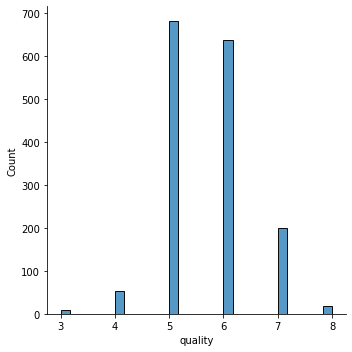

In [ ]:
sns.displot(data['quality'])

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
temp = data.iloc[:,0:-1]
temp.shape

(1599, 11)

In [ ]:
#####################################################################################################################
#   Assignment 2: Neural Network Analysis
#   This is a starter code in Python 3.6 for a neural network.
#   You need to have numpy and pandas installed before running this code.
#   You need to complete all TODO marked sections
#   You are free to modify this code in any way you want, but need to mention it
#       in the README file.
#
#####################################################################################################################


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.callbacks import History
import matplotlib.pyplot as plt
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

class NeuralNet:
        
    def __init__(self, dataFile, header=True):
        self.raw_input = pd.read_csv(dataFile, sep=';')
        self.hyper_combinations = []
        self.hypers1 = []
        self.result_data = dict()



    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    #   categorical to numerical, etc
    def preprocess(self):
        self.processed_data = self.raw_input
        ncols = len(self.processed_data.columns)
        scaler = StandardScaler()
        # Fit only to the training data
        scaler.fit(self.processed_data.iloc[:, 0:-1])
        # Now apply the transformations to the data:
        self.processed_data = scaler.transform(self.processed_data.iloc[:, 0:-1])
        

    # TODO: Train and evaluate models for all combinations of parameters
    # specified. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model

    def train_evaluate(self):
        # ncols = len(self.processed_data.columns)
        # nrows = len(self.processed_data.index)
        X = self.processed_data
        y = self.raw_input.iloc[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        # one hot encoding to process output vectors in output layer for classification in 10 different classes of target attribute = quality of wine
        y_train = tf.keras.utils.to_categorical(list(y_train), num_classes=10) 
        y_test = tf.keras.utils.to_categorical(list(y_test), num_classes=10)

        # Below are the hyperparameters that you need to use for model
        #   evaluation
        activations = ['sigmoid', 'tanh', 'relu']
        learning_rate = [0.01, 0.1]
        max_iterations = [100, 200] # also known as epochs
        num_hidden_layers = [2, 3]
        self.hypers1.extend((activations, learning_rate, max_iterations, num_hidden_layers))
        size = int(len(self.hypers1))

        # making a list of all possible combinations of given hyper parameters to be analyzed in form [activation, lr, epoch, hidden layer count] 
        # for example ['logistic', 0.1, 200, 3] shall be used to creating NN with activation function = 'logistic' with lr=0.1 and 3 hidden layers running for 200 epochs
        # there will be a total of 24 Neural Networks that shall be created based on the set of hyper parameters already provided by the question
        self.param_combinations(size)
        print(len(self.hyper_combinations))
        print(X_train)
        print(y_train)
        temp = pd.DataFrame(y_train)
        print(temp)

        
        # separating analysis cases based on epochs and lr hyper parameters for ease of comparing plot results later regarding accuracy and loss against epochs
        # the resultant dictionary key for each case is of form (lr, epoch)-> giving its respective neural networks
        for i in self.hyper_combinations:
          key_tuple = tuple((i[1],i[2]))
          if key_tuple not in self.result_data.keys():
            self.result_data[key_tuple] = dict()
          #result_data[key_tuple].append(i)

          history = History()
          nn = tf.keras.models.Sequential()
          #keeping same number of perceptrons in each hidden layer to keep it simple for analyses of hyper parameters
          nn.add(tf.keras.layers.Dense(units=11, input_shape=(11,),  activation=i[0]))
          for j in range(i[3]-1):
            nn.add(tf.keras.layers.Dense(units=22,  activation=i[0]))
          nn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
          opt = tf.keras.optimizers.Adam(i[1])
          nn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
          
          print('Model Summary:')
          nn.summary()
          print("END")
          nn.fit(X_train, y_train, batch_size=10, epochs=i[2], callbacks=[history])

          score = nn.evaluate(X_test, y_test, batch_size=10, return_dict=True)
          evaluations = []
          evaluations.append(score)
          evaluations.append(history.history)
          print("Eval:")
          # print(evaluations)
          # print()
          self.result_data[key_tuple][tuple(i)] = evaluations

        print(self.result_data)


        return 0

    def param_combinations(self, param_count, prev=[]):
      if param_count<=0:
        self.hyper_combinations.append(prev)
        return
      index_num = len(self.hypers1) - param_count
      for i in self.hypers1[index_num]:
        temp = prev.copy()
        temp.append(i)
        self.param_combinations(param_count-1,temp)


if __name__ == "__main__":
    neural_network = NeuralNet("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") # put in path to your file
    neural_network.preprocess()
    neural_network.train_evaluate()


Streaming output truncated to the last 5000 lines.
Epoch 53/100
120/120 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7590
Epoch 54/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7531
Epoch 55/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7456
Epoch 56/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7623
Epoch 57/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7690
Epoch 58/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7398
Epoch 59/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7515
Epoch 60/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7706
Epoch 61/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7723
Epoch 62/100
120/120 [=========

In [ ]:
type(neural_network.result_data[(0.01, 100)][('sigmoid',0.01, 100, 2)][1]['accuracy'])

list

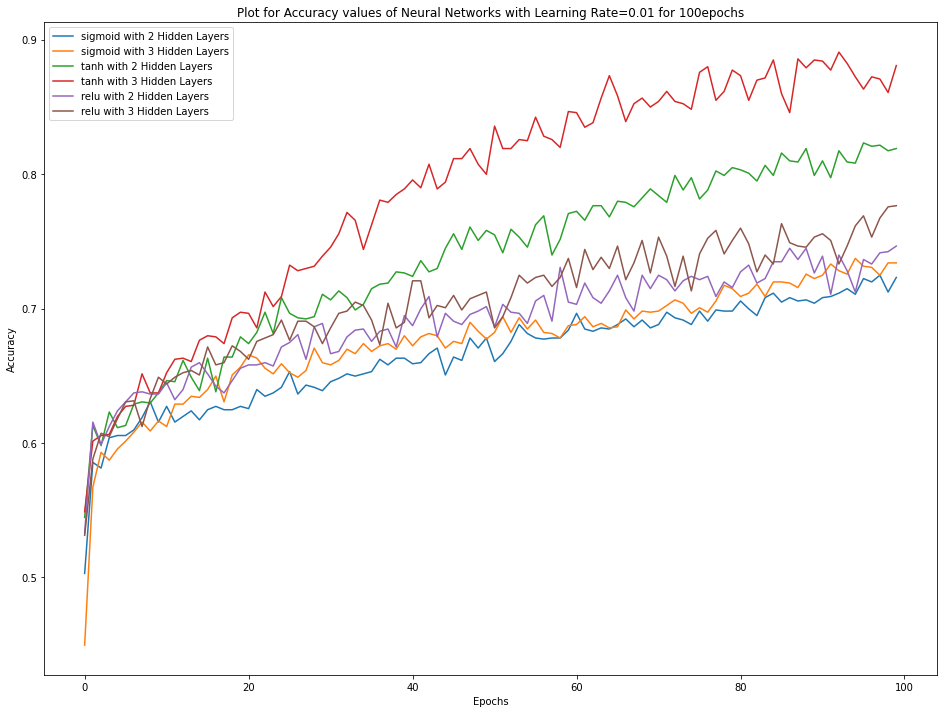

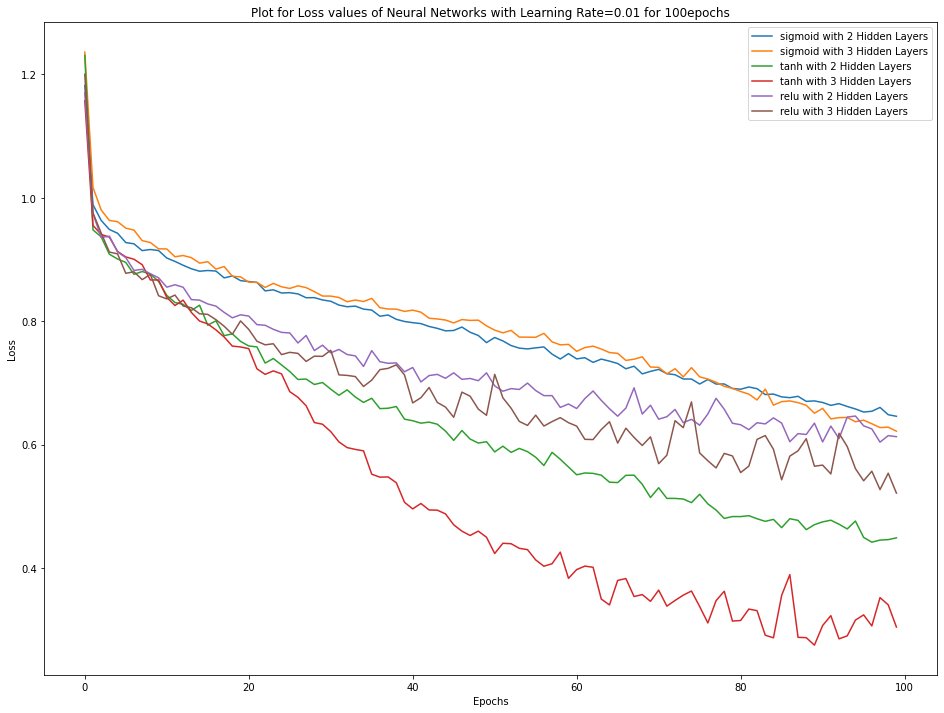

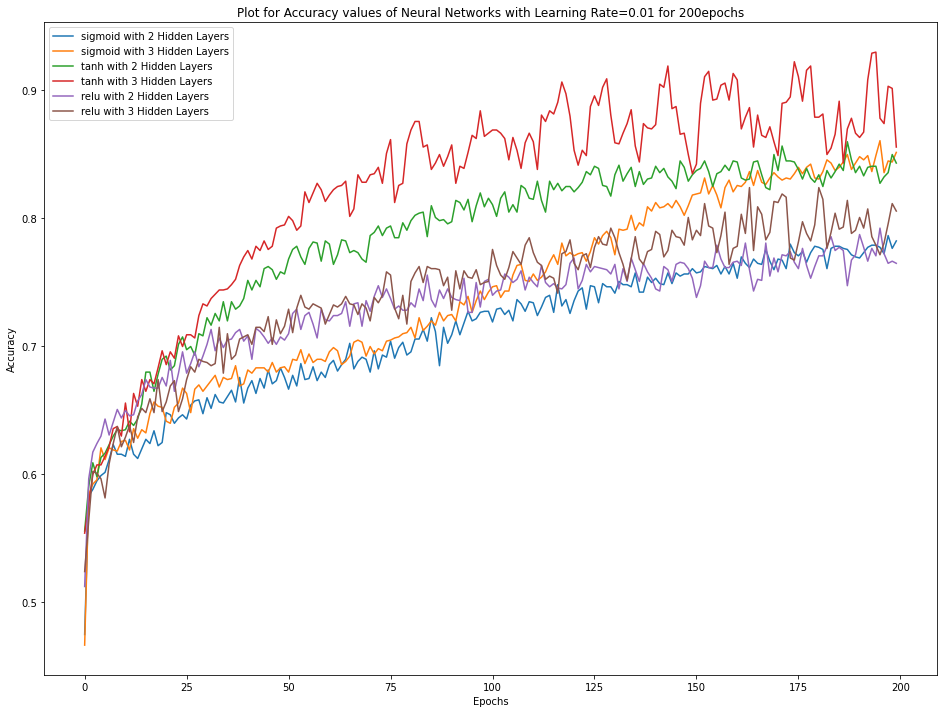

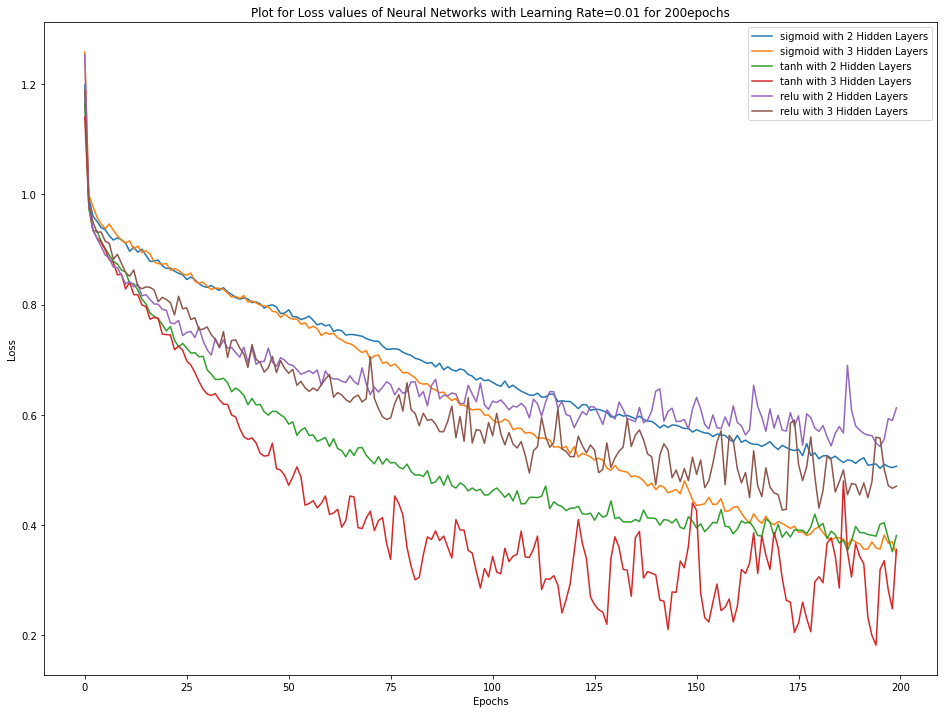

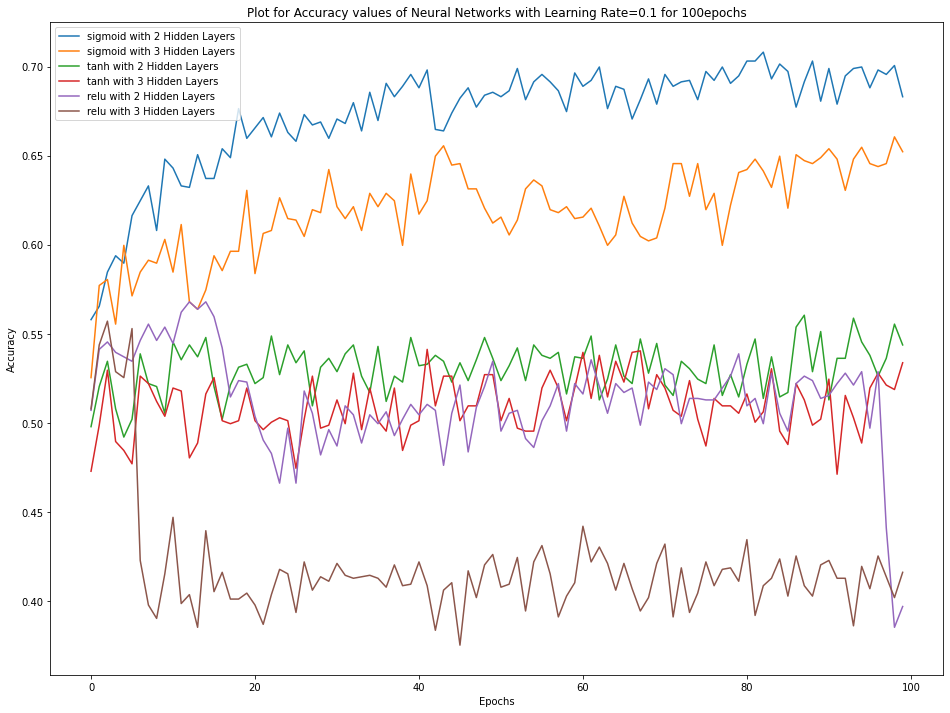

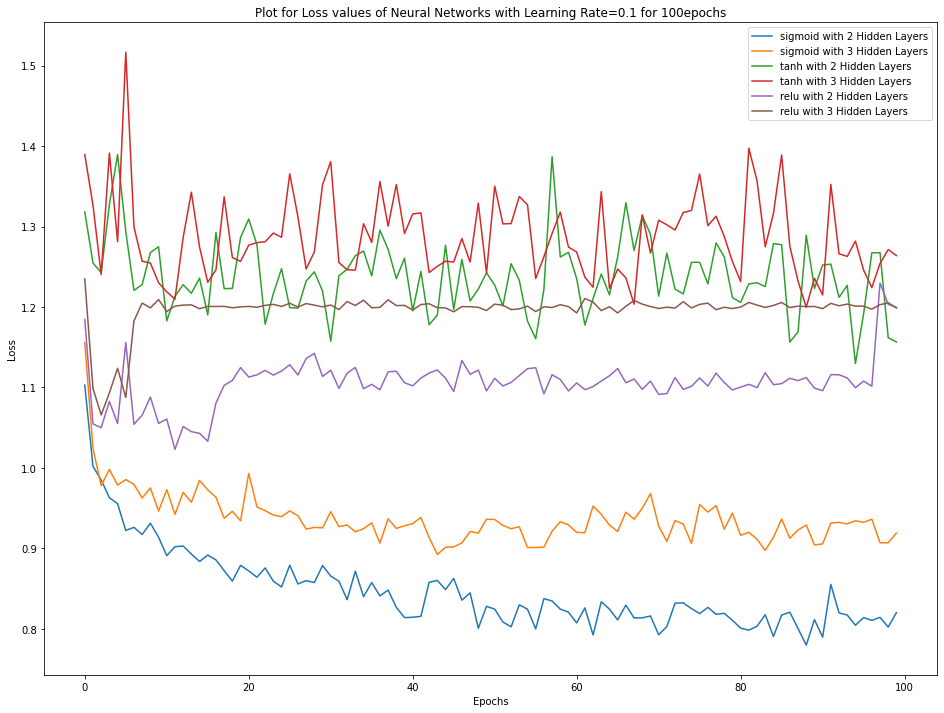

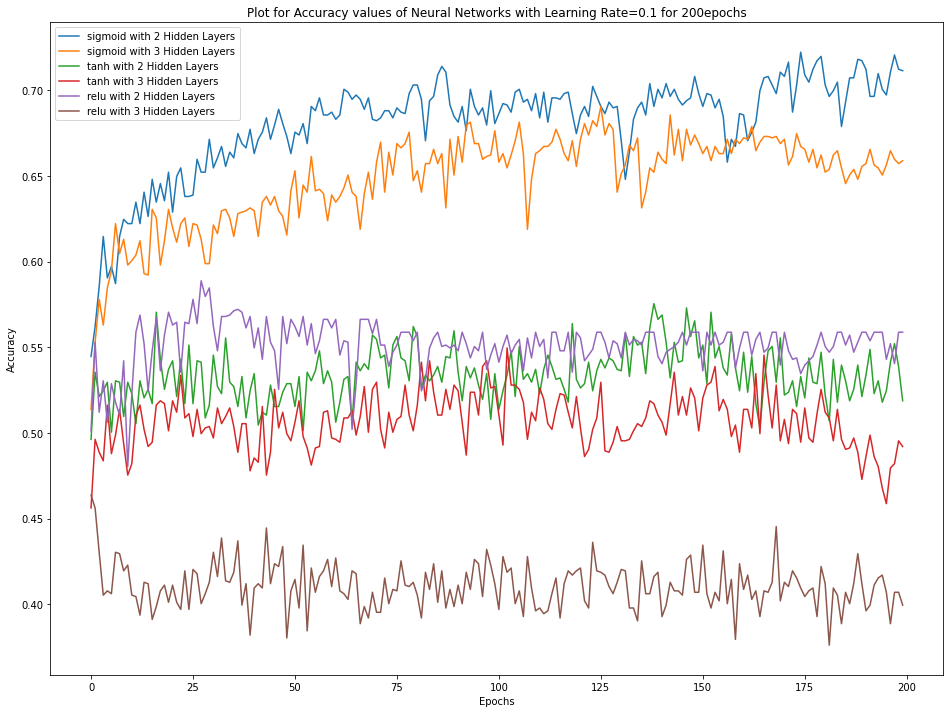

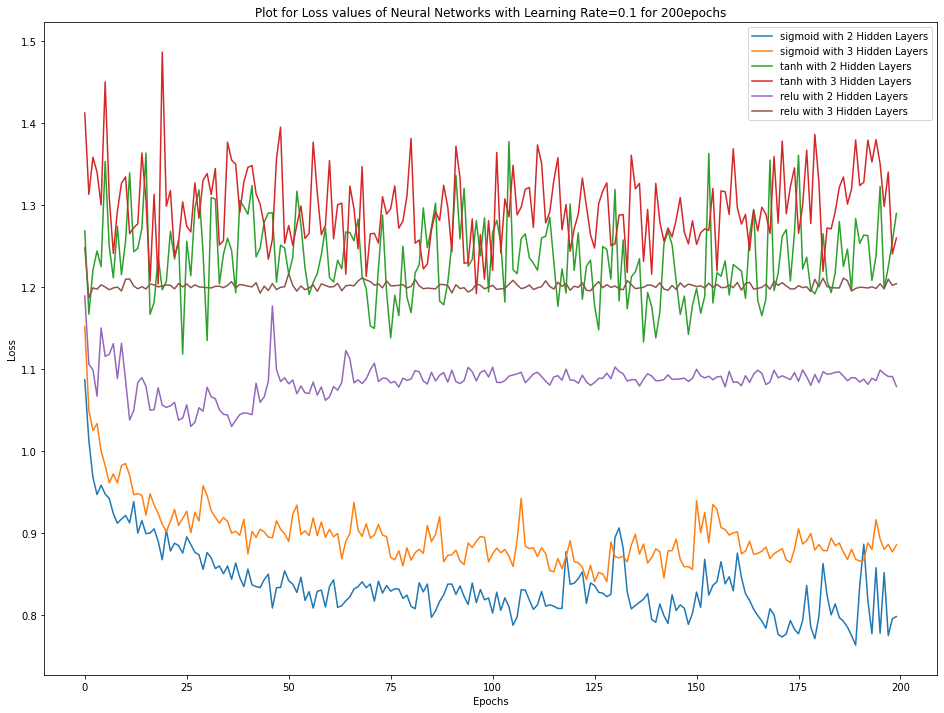

In [ ]:
# now ploting for each set of 6 NNs separated based on learning rate and epoch values
# TOTAL 8 PLOTS
# clarification ==>> result_data is of form => dict{(learning_rate, max_iteration) : dict{ (activation, learning_rate, max_iteration, hidden_layer) : [score, history] }} where score is loss and accuracy for test data and history is the loss and accuracy changing with every passing epoch
# The result_data structure looks complex but it eases up the plotting of results for same combinations of learning_rate and max_iteration values thereby justifying the purpose plots
for i in neural_network.result_data.keys():
  plot_title = 'Plot for Accuracy values of Neural Networks with Learning Rate=' + str(i[0]) + ' for ' + str(i[1]) + 'epochs'

  f = plt.figure()
  f.set_figwidth(16)
  f.set_figheight(12)

  # accuracy plot for each epoch at specific learning_rate
  for j in neural_network.result_data[i].keys():
    plot_label = str(j[0]) + ' with ' + str(j[3]) + ' Hidden Layers'
    
    plt.plot(neural_network.result_data[i][j][1]['accuracy'], label = plot_label)
  plt.plot()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(plot_title)
  plt.legend()
  plt.show()

  print('')
  print('')


  plot_title = 'Plot for Loss values of Neural Networks with Learning Rate=' + str(i[0]) + ' for ' + str(i[1]) + 'epochs'

  f = plt.figure()
  f.set_figwidth(16)
  f.set_figheight(12)

  # loss plot for each epoch at specific learning_rate
  for j in neural_network.result_data[i].keys():
    plot_label = str(j[0]) + ' with ' + str(j[3]) + ' Hidden Layers'
    
    plt.plot(neural_network.result_data[i][j][1]['loss'], label = plot_label)
  plt.plot()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(plot_title)
  plt.legend()
  plt.show()

  print('')
  print('')

In [ ]:
# Displaying evaluation metrics scores of accuracy and loss for test data based on NUMBER OF HIDDEN LAYERS in the neural network
layer_based = dict()
for i in neural_network.result_data.values():
  for j in list(i.keys()):
    if j[3] not in layer_based:
      layer_based[j[3]] = list()
    result_string = '({activation} function, {lr}, {epochs}) --->> Loss : {loss}, Accuracy: {accuracy}'.format(activation=j[0], lr=j[1], epochs=j[2], loss=i[j][0]['loss'], accuracy=i[j][0]['accuracy'])
    layer_based[j[3]] +=  [result_string]

for i in layer_based.keys():
  print('Results based on '+str(i)+' hidden layers :')
  print('(activation_func, lr, epochs) --->> Loss : {loss}, Accuracy: {accuracy}')
  for j in layer_based[i]:
    print(j)
  print('')

Results based on 2 hidden layers :
(activation_func, lr, epochs) --->> Loss : {loss}, Accuracy: {accuracy}
(sigmoid function, 0.01, 100) --->> Loss : 1.2376413345336914, Accuracy: 0.5724999904632568
(tanh function, 0.01, 100) --->> Loss : 1.6674551963806152, Accuracy: 0.5550000071525574
(relu function, 0.01, 100) --->> Loss : 1.4594166278839111, Accuracy: 0.5475000143051147
(sigmoid function, 0.01, 200) --->> Loss : 1.5800312757492065, Accuracy: 0.5824999809265137
(tanh function, 0.01, 200) --->> Loss : 1.9001933336257935, Accuracy: 0.5774999856948853
(relu function, 0.01, 200) --->> Loss : 1.7298580408096313, Accuracy: 0.5325000286102295
(sigmoid function, 0.1, 100) --->> Loss : 1.3352888822555542, Accuracy: 0.5899999737739563
(tanh function, 0.1, 100) --->> Loss : 1.1745930910110474, Accuracy: 0.5824999809265137
(relu function, 0.1, 100) --->> Loss : 1.1847083568572998, Accuracy: 0.4000000059604645
(sigmoid function, 0.1, 200) --->> Loss : 1.4716827869415283, Accuracy: 0.579999983310

In [ ]:
# Displaying evaluation metrics scores of accuracy and loss for test data based on ACTIVATION FUNCTION used in the neural network
activation_based = dict()
for i in neural_network.result_data.values():
  for j in list(i.keys()):
    if j[0] not in activation_based:
      activation_based[j[0]] = list()
    result_string = '({layers} layers, {lr}, {epochs}) --->> Loss : {loss}, Accuracy: {accuracy}'.format(layers=j[3], lr=j[1], epochs=j[2], loss=i[j][0]['loss'], accuracy=i[j][0]['accuracy'])
    activation_based[j[0]] +=  [result_string]

for i in activation_based.keys():
  print('Results based on '+str(i)+' activation used :')
  print('(hidden_layers, lr, epochs) --->> Loss : {loss}, Accuracy: {accuracy}')
  for j in activation_based[i]:
    print(j)
  print('')

Results based on sigmoid activation used :
(hidden_layers, lr, epochs) --->> Loss : {loss}, Accuracy: {accuracy}
(2 layers, 0.01, 100) --->> Loss : 1.2376413345336914, Accuracy: 0.5724999904632568
(3 layers, 0.01, 100) --->> Loss : 1.2477189302444458, Accuracy: 0.5649999976158142
(2 layers, 0.01, 200) --->> Loss : 1.5800312757492065, Accuracy: 0.5824999809265137
(3 layers, 0.01, 200) --->> Loss : 1.9880272150039673, Accuracy: 0.5525000095367432
(2 layers, 0.1, 100) --->> Loss : 1.3352888822555542, Accuracy: 0.5899999737739563
(3 layers, 0.1, 100) --->> Loss : 1.07852041721344, Accuracy: 0.5525000095367432
(2 layers, 0.1, 200) --->> Loss : 1.4716827869415283, Accuracy: 0.5799999833106995
(3 layers, 0.1, 200) --->> Loss : 1.1088058948516846, Accuracy: 0.4950000047683716

Results based on tanh activation used :
(hidden_layers, lr, epochs) --->> Loss : {loss}, Accuracy: {accuracy}
(2 layers, 0.01, 100) --->> Loss : 1.6674551963806152, Accuracy: 0.5550000071525574
(3 layers, 0.01, 100) --->